# supervisado 

##  nnet
* Utilizar keras

In [1]:
! pip install kaleido


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [30]:
import numpy as np
import os
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import tarfile
import zipfile
from  sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.figure_factory as ff
import plotly.express as px
import statsmodels.api as sm
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
global static_img
static_img=True
def display_static(fig):
    if static_img:
        return Image(fig.to_image(format="png"))
    else:
        return fig

In [3]:
df = pd.read_csv("data/CARS.csv")
df["Invoice"] = df["Invoice"].replace('[\$,]', '', regex=True).astype(float)

In [4]:
df.describe(include="all")

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428,428,428,428,428,428,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
unique,38,425,6,3,3,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Toyota,C320 4dr,Sedan,Asia,Front,"$21,055",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,2,262,158,226,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,NaN,NaN,NaN,NaN,NaN,NaN,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,NaN,NaN,NaN,NaN,NaN,NaN,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000


In [5]:
df["EnvFriendly"] = df[["MPG_City","MPG_Highway"]]\
    .apply(lambda x: 1 if x["MPG_City"]>=21 and x["MPG_Highway"]>=23 else 0, axis=1)

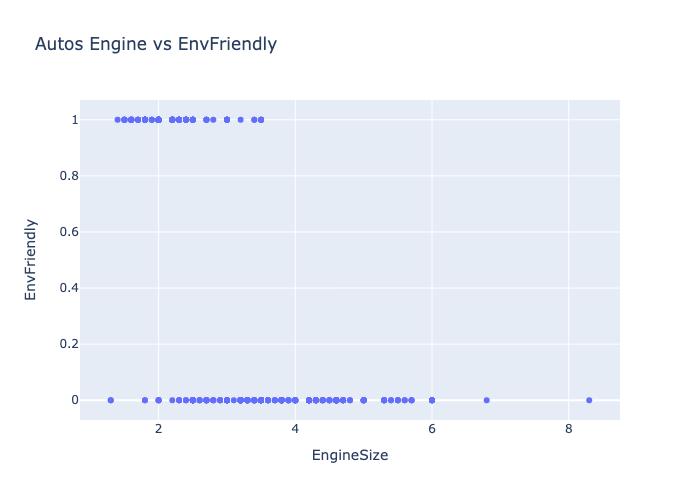

In [6]:
fig = px.scatter(df[["EngineSize","EnvFriendly"]], x="EngineSize", y="EnvFriendly", 
                 title="Autos Engine vs EnvFriendly"
                )
display_static(fig)

In [7]:
pd.get_dummies(df[['Type','Origin','DriveTrain']],
                      prefix=['Type','Origin','DriveTrain'],
                      dummy_na=True, drop_first=True)

,Type_SUV,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Type_nan,Origin_Europe,Origin_USA,Origin_nan,DriveTrain_Front,DriveTrain_Rear,DriveTrain_nan
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,0,1,0,0
6,0,0,1,0,0,0,0,0,0,0,1,0
7,0,1,0,0,0,0,1,0,0,1,0,0
8,0,1,0,0,0,0,1,0,0,1,0,0
9,0,1,0,0,0,0,1,0,0,1,0,0


In [8]:
df_x = pd.get_dummies(df[['Type','Origin','DriveTrain']],
                      prefix=['Type','Origin','DriveTrain'],
                      dummy_na=True, drop_first=True)
df_x = pd.concat((df_x, df), axis=1)
cols = [c for c in df_x.columns if c.startswith("Type_") or c.startswith("Origin_") or c.startswith("DriveTrain_")]
cols = cols + ["Invoice","EngineSize","Cylinders","Horsepower","Weight","Wheelbase","Length","EnvFriendly"]
df_x = df_x[cols].fillna(0)
y = df_x['EnvFriendly']
cols.remove("EnvFriendly")
X = df_x[cols]
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [9]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.Logit(y_train, X_train).fit(method='bfgs',maxiter=10000)
model.summary()

         Current function value: 0.148113
         Iterations: 179
         Function evaluations: 206
         Gradient evaluations: 184


/Users/joseramirez/repository/UCO_ML_AI/venv/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning:

overflow encountered in exp

/Users/joseramirez/repository/UCO_ML_AI/venv/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning:

divide by zero encountered in log

/Users/joseramirez/repository/UCO_ML_AI/venv/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning:

overflow encountered in exp

/Users/joseramirez/repository/UCO_ML_AI/venv/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning:

divide by zero encountered in log

/Users/joseramirez/repository/UCO_ML_AI/venv/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/joseramirez/repository/UCO_ML_AI/venv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            EnvFriendly   No. Observations:                  342
Model:                          Logit   Df Residuals:                      325
Method:                           MLE   Df Model:                           16
Date:                Thu, 11 May 2023   Pseudo R-squ.:                  0.7694
Time:                        01:14:53   Log-Likelihood:                -50.655
converged:                      False   LL-Null:                       -219.71
Covariance Type:            nonrobust   LLR p-value:                 3.111e-62
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               64.6769        nan        nan        nan         nan         nan
Type_SUV           -20.9543        nan        nan        nan         nan         nan
Type_Sedan         -20.5405        nan        nan        nan         nan         nan
Type_Sports        -23.6126        nan        nan        nan         nan         nan
Type_Truck         -18.5794        nan        nan        nan         nan         nan
Type_Wagon         -21.6639        nan        nan        nan         nan         nan
Type_nan                  0        nan        nan        nan         nan         nan
Origin_Europe       -0.5798        nan        nan        nan         nan         nan
Origin_USA           0.0253        nan        nan        nan         nan         nan
Origin_nan                0        nan        nan        nan         nan         nan
DriveTrain_Front     2.0412        nan        nan        nan         nan         nan
DriveTrain_Rear     -1.0021        nan        nan        nan         nan         nan
DriveTrain_nan            0        nan        nan        nan         nan         nan
Invoice          -9.028e-06        nan        nan        nan         nan         nan
EngineSize          -1.0913        nan        nan        nan         nan         nan
Cylinders           -0.6371        nan        nan        nan         nan         nan
Horsepower          -0.0095        nan        nan        nan         nan         nan
Weight              -0.0044        nan        nan        nan         nan         nan
Wheelbase           -0.3320        nan        nan        nan         nan         nan
Length               0.0689        nan        nan        nan         nan         nan
====================================================================================

Possibly complete quasi-separation: A fraction 0.28 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [10]:
y_hat = [ 1 if i>0.5 else 0 for i in model.predict(X_train)]
#accuracy by hand
sum([1 if h==t else 0 for h,t in zip(y_hat,y_train)])/len(y_hat)

0.9210526315789473

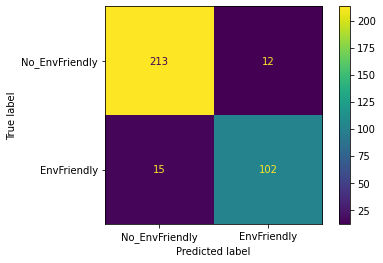

In [11]:
cm = confusion_matrix(y_train, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["No_EnvFriendly","EnvFriendly"])
disp.plot()

In [12]:
y_hat = [ 1 if i>0.5 else 0 for i in model.predict(X_test)]
#accuracy by hand
sum([1 if h==t else 0 for h,t in zip(y_hat,y_test)])/len(y_hat)

0.8488372093023255

### Redes reuronales

In [13]:
X_train.shape

(342, 20)

In [59]:

# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model = Sequential()
model.add(Dense(10, input_shape=(20,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Train: 0.886, Test: 0.767


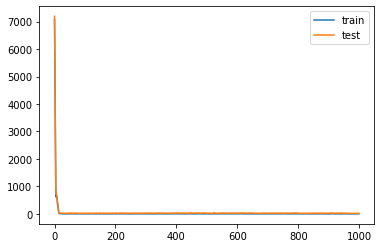

In [57]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=50, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Train: 0.863, Test: 0.837


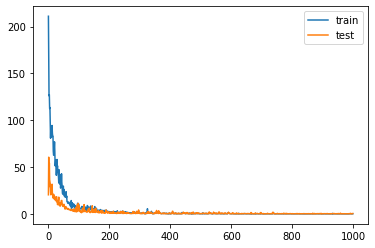

In [71]:
model = Sequential()
model.add(Dense(10, input_shape=(20,)))
model.add(Dropout(0.1))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=0, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Convolutional Neural NETS
Replicar la arquitectura de Resnet para el data set de Cifrar
Logistic Regresion vs AlexNet

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
import numpy as np


In [6]:
## Convolutional nets
img_cifar = pd.read_csv("data/digits.csv")

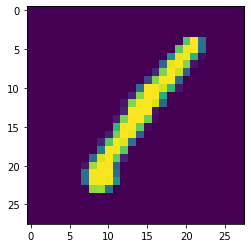

In [24]:
c_pix = img_cifar.columns
c_pix = c_pix[1:]
im = img_cifar.head(0)[c_pix].values
plt.imshow(img_cifar[c_pix].values[0].reshape(28,28))

In [17]:
img_cifar.shape

(42000, 785)

In [20]:
arr = img_cifar[c_pix].values
X_img = np.reshape(arr, (-1, 28, 28))
y_img = to_categorical(img_cifar["label"], dtype ="uint8")

In [25]:
X_train,X_test, y_train,y_test = train_test_split(X_img,y_img,test_size=0.2)

In [236]:
#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=32, input_shape=(28,28,1), kernel_size=(3,3),padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, activation='relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096, activation='relu'))

# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000, activation='relu'))

# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(10, activation='softmax'))

model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 14, 14, 256)       33024     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 7, 7, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 7, 7, 384)         393600    
                                                                 
 conv2d_50 (Conv2D)          (None, 7, 7, 384)       

In [238]:
# model.fit(X_train, y_train,  epochs=3) #si no ponemos el batch el gradiente cmabia por cada dato
model.fit(X_train, y_train,  epochs=3, batch_size=500)

Epoch 1/3
68/68 [==============================] - 107s 2s/step - loss: 0.0997 - accuracy: 0.9708
Epoch 2/3
68/68 [==============================] - 107s 2s/step - loss: 0.0535 - accuracy: 0.9843
Epoch 3/3
68/68 [==============================] - 111s 2s/step - loss: 0.0357 - accuracy: 0.9895


In [243]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.994, Test: 0.984


### Using a Logistic regresion
Generamos un accuracy en test de 91.4%

In [31]:
X_train_lg = np.reshape(X_train, (-1, 28*28))
X_test_lg = np.reshape(X_test, (-1, 28*28))
y_train_lg = np.argmax(y_train,axis=1)
y_test_lg = np.argmax(y_test,axis=1)

In [33]:
clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=100).fit(X_train_lg, y_train_lg)

/Users/joseramirez/repository/UCO_ML_AI/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
train_acc = clf.score(X_train_lg, y_train_lg)
test_acc = clf.score(X_test_lg, y_test_lg)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.940, Test: 0.918


<AxesSubplot:>

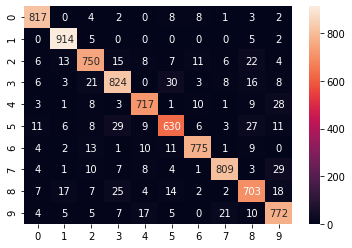

In [35]:
import seaborn as sns
cm = confusion_matrix(y_test_lg, clf.predict(X_test_lg), clf.predict(X_test_lg), labels=np.unique(y_train_lg))
sns.heatmap(cm, annot=True, fmt='g')

[(27, (8, 1)), (30, (4, 9)), (34, (9, 7)), (41, (3, 0)), (64, (8, 5))]


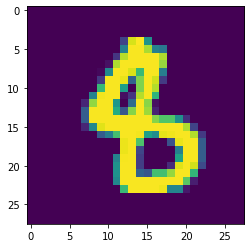

In [52]:
# ejemplo error 4 con cara de 9 :) 
error = sorted(enumerate(list(zip(y_test_lg, clf.predict(X_test_lg)))),
               key=lambda x: (x[1][0] != x[1][1]), reverse=True)
print(error[0:5])
plt.imshow(X_test_lg[64].reshape(28,28))